# Netflix Data Analysis

# Sommaire
* lorem ipsum

* lorem ipsum

* lorem ipsum


# Intro

In [45]:
'''
questions 3 & 4
'''

import pandas as pd
import numpy as np
import missingno as msno
import re
import matplotlib.pyplot as plt

data = pd.read_csv('netflix_titles.csv')

# Afficher les 5 premières observations
print("5 premières observations :")
print(data.head())

# Afficher les 5 dernières observations
print("\n5 dernières observations :")
print(data.tail())

5 premières observations :
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2 

In [10]:
'''
questions 5
'''

# Afficher les informations du DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [13]:
'''
questions 6
'''

# Afficher la dimensionnalité du DataFrame
print("Nombre de variable puis d'observation du DataFrame :", data.shape)

Nombre de variable puis d'observation du DataFrame : (8807, 12)


In [14]:
'''
questions 7
'''

# Afficher les noms des colonnes
print("Colonnes du DataFrame :", data.columns)

Colonnes du DataFrame : Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [15]:
'''
questions 8
'''

# Afficher les types des différentes colonnes
print("Types des colonnes du DataFrame :")
print(data.dtypes)

Types des colonnes du DataFrame :
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [16]:
'''
questions 9
'''

# Vérifier les données manquantes
donnees_manquantes = data.isna().sum()

# Calculer la proportion en pourcentage
proportion_manquante = (donnees_manquantes / len(data)) * 100

# Afficher les données manquantes et la proportion en pourcentage
print("Données manquantes par colonne :")
print(donnees_manquantes)
print("\nProportion de données manquantes en pourcentage :")
print(proportion_manquante)

Données manquantes par colonne :
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Proportion de données manquantes en pourcentage :
show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


<Axes: >

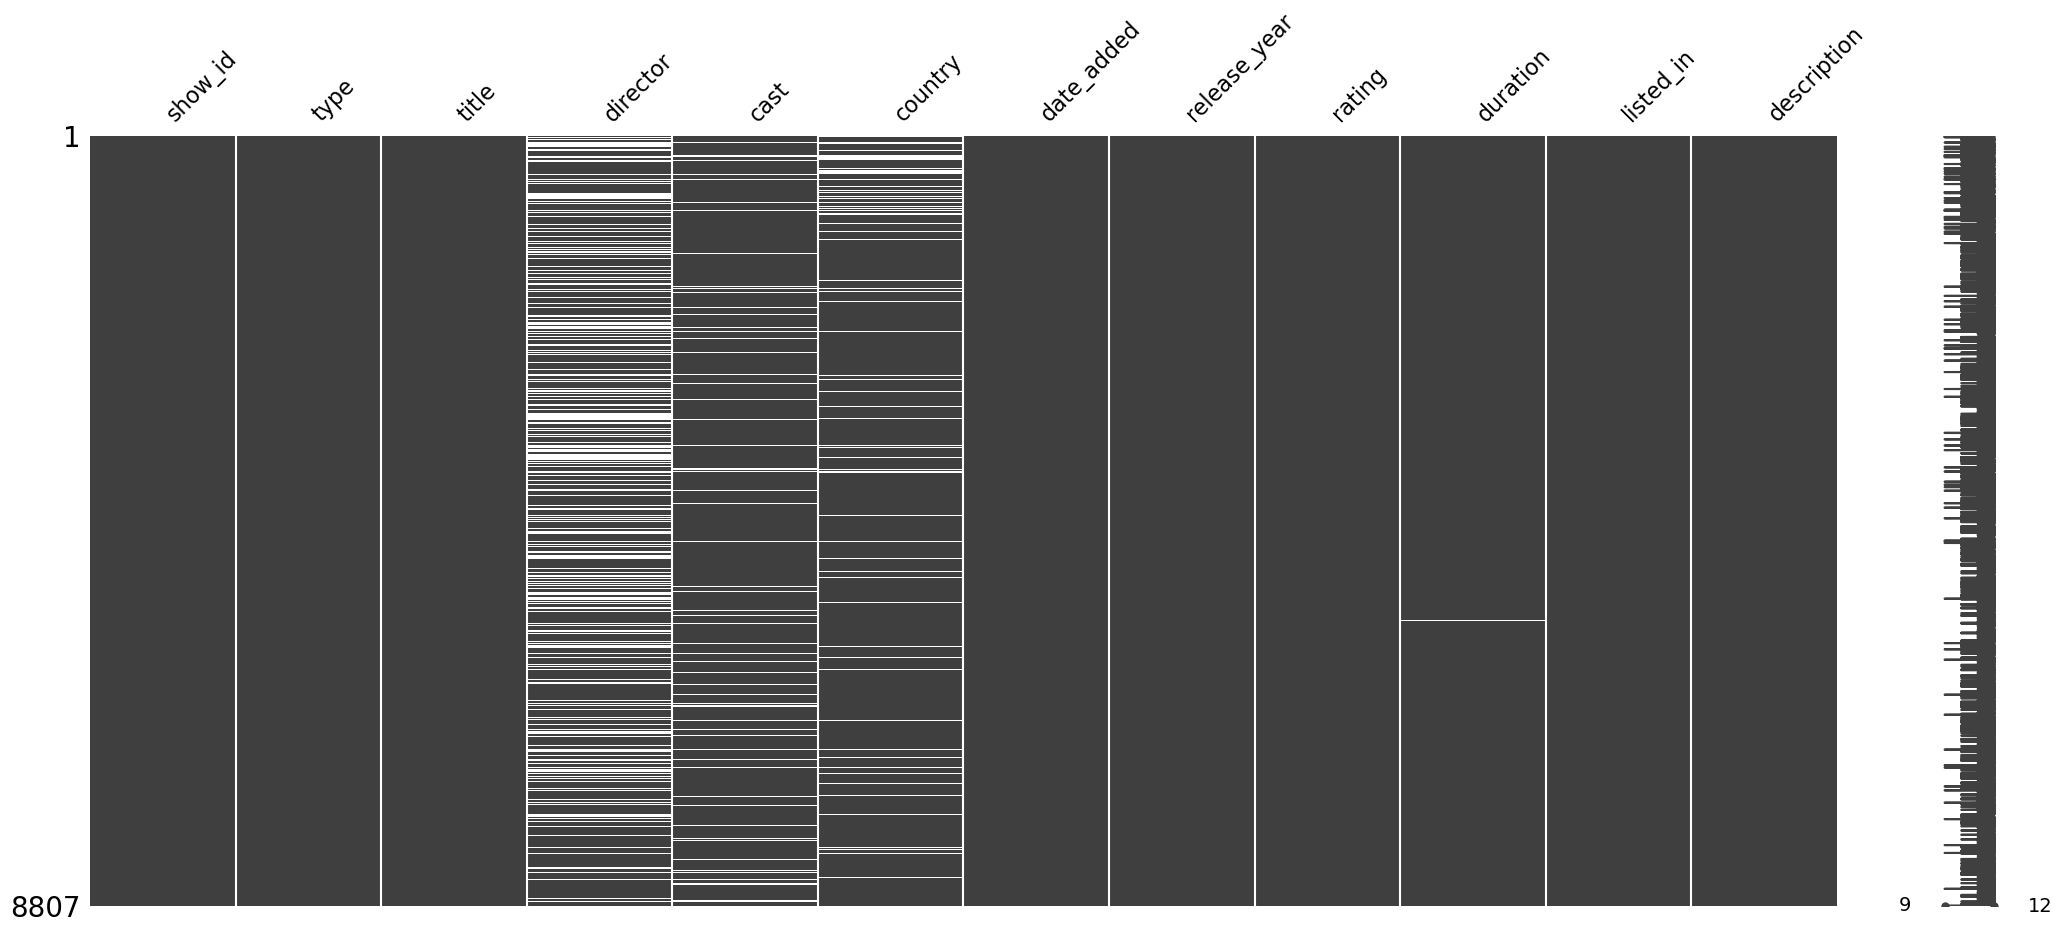

In [26]:
'''
questions 10
'''

# Afficher un graphique représentatif des données manquantes
msno.matrix(data)

In [22]:
'''
questions 11
'''

# Afficher une observation aléatoire
observation_aleatoire = data.sample()
print("Observation aléatoire du DataFrame :")
print(observation_aleatoire)

Observation aléatoire du DataFrame :
    show_id     type                  title director  \
682    s683  TV Show  Why Are You Like This      NaN   

                                        cast    country     date_added  \
682  Naomi Higgins, Olivia Junkeer, Wil King  Australia  June 19, 2021   

     release_year rating  duration                            listed_in  \
682          2021  TV-MA  1 Season  International TV Shows, TV Comedies   

                                           description  
682  Three best friends negotiate work, fun, identi...  


In [24]:
'''
questions 12
'''

# Filtrer les informations pour l'oeuvre "Catch Me If You Can"
catch_me_info = data[data['title'] == 'Catch Me If You Can']

# Afficher toutes les informations de l'oeuvre "Catch Me If You Can"
print(catch_me_info)

    show_id   type                title          director  \
329    s330  Movie  Catch Me If You Can  Steven Spielberg   

                                                  cast                country  \
329  Leonardo DiCaprio, Tom Hanks, Christopher Walk...  United States, Canada   

         date_added  release_year rating duration listed_in  \
329  August 1, 2021          2002  PG-13  142 min    Dramas   

                                           description  
329  An FBI agent makes it his mission to put cunni...  


In [33]:
'''
questions 13
'''

# Trier le DataFrame par année de sortie et par date d'ajout
data_sorted = data.sort_values(by=['release_year', 'date_added'], ascending=False)

# Sélectionner le nom du film le plus récent (premier élément après le tri)
nom_film_plus_recent = data_sorted.iloc[0]['title']

# Afficher le nom du film le plus récent
print("Le film le plus récent dans le dataset est :", nom_film_plus_recent)

Le film le plus récent dans le dataset est : Blood Brothers: Malcolm X & Muhammad Ali


In [35]:
'''
questions 14
'''

# Filtrer les entrées pour ne considérer que les séries TV
series_tv = data[data['type'] == 'TV Show']

# Trier le DataFrame des séries TV par année de sortie et par date d'ajout
series_tv_sorted = series_tv.sort_values(by=['release_year', 'date_added'], ascending=False)

# Sélectionner le nom de la série TV la plus récente (premier élément après le tri)
nom_serie_plus_recente = series_tv_sorted.iloc[0]['title']

# Afficher le nom de la série TV la plus récente
print("La série TV la plus récente dans le dataset est :", nom_serie_plus_recente)

La série TV la plus récente dans le dataset est : Into the Night


In [43]:
'''
questions 15
'''

# Remplacer les valeurs manquantes par une valeur par défaut (par exemple, '1900-01-01')
data['date_added'].fillna('1900-01-01', inplace=True)

# Convertir la colonne 'date_added' en type DateTime en spécifiant le format si nécessaire
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce', format='%Y-%m-%d')

# Afficher le type de la colonne 'date_added' après conversion
print("Type de la colonne 'date_added' après conversion :", data['date_added'].dtype)

Type de la colonne 'date_added' après conversion : datetime64[ns]


In [46]:
'''
questions 16
'''

# Convertir toutes les valeurs de la colonne 'duration' en chaînes de caractères
data['duration'] = data['duration'].astype(str)

# Fonction pour extraire le nombre de minutes
def extract_minutes(duration):
    if 'min' in duration:
        return int(re.search(r'\d+', duration).group())
    elif 'saison' in duration:
        return int(re.search(r'\d+', duration).group()) * 60 * 24 * 30  # Par exemple, 1 saison = 30 jours

# Appliquer la fonction à la colonne 'duration' pour obtenir la durée en minutes
data['duration'] = data['duration'].apply(extract_minutes)

# Afficher les premières lignes pour vérifier le résultat
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating  duration  \
0  September 25, 2021          2020  PG-13      90.0   
1  September 24, 2021          2021  TV-MA       NaN   
2  September 24, 2021          2

In [49]:
'''
question 17
'''

# Convertir toutes les valeurs de la colonne 'duration' en chaînes de caractères
data['duration'] = data['duration'].astype(str)

# Fonction pour extraire le nombre de minutes
def extract_minutes(duration):
    if 'saison' in duration:
        return int(re.search(r'\d+', duration).group())
    elif 'min' in duration:
        return int(re.search(r'\d+', duration).group()) * 60 * 24 * 30  # Par exemple, 1 saison = 30 jours

# Appliquer la fonction à la colonne 'duration' pour obtenir la durée en minutes
data['duration'] = data['duration'].apply(extract_minutes)

# Afficher les premières lignes pour vérifier le résultat
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating duration  \
0  September 25, 2021          2020  PG-13     None   
1  September 24, 2021          2021  TV-MA     None   
2  September 24, 2021          2021

In [59]:
'''
question 18
'''


# Convertir la chaîne de caractères en une liste de chaînes de caractères
data['listed_in'] = data['listed_in'].str.split(',').apply(lambda x: [s.strip() for s in x])

# Afficher les premières lignes pour vérifier le résultat
print(data.head())

TypeError: 'float' object is not iterable

In [55]:
'''
question 19
'''

#creation d'une liste avec les differentes variables 
variables= ["type", "country" , "release_year" , "rating" , "listed_in"]
#pour chaque variables , leurs contenus vont etre print
for variable in variables:
    #.unique sert a voir chaque contenu en une fois 
    values = data[variable].unique()
    print("----------------------------------------------------")
    print(f"variable {variable} : ")
    print(values)


----------------------------------------------------
variable type : 
['Movie' 'TV Show']
----------------------------------------------------
variable country : 
['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'U

TypeError: unhashable type: 'list'

In [60]:
'''
question 20
'''

#ça prends chaque contenu de la categorie director avec le nombre de fois que c'est écrit
number_director = data["director"].value_counts()
#on selectionne tout les éléments qui sont écrit minimum une fois
multicreators = number_director[number_director >1]

print(multicreators)

director
Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Marcus Raboy                  16
Suhas Kadav                   16
Jay Karas                     14
                              ..
Abhijit Panse                  2
Jose Manuel Colón              2
Rhys Thomas                    2
Rizal Mantovani                2
Nawapol Thamrongrattanarit     2
Name: count, Length: 867, dtype: int64


In [64]:
'''
question 21 & 22
'''


# Supprimer les espaces en trop dans la colonne "date_added"
data["date_added"] = data["date_added"].str.strip()

# Convertir la colonne "date_added" en datetime en indiquant le format
data["date_added"] = pd.to_datetime(data["date_added"], format='%B %d, %Y')

#selection des films
films = data[data["type"]=="Movie"]
#selection des films
films = data[data["type"]=="TV Show"]

# Extraire l'année à partir de la colonne "date_added" et la mettre dans une nouvelle colonne "film_par_an"
data["film_par_an"] = films["date_added"].dt.year
# pareil mais en mettant dans une colonne "films_par_an"
data["films_par_an"] = films["date_added"].dt.year

# Compter le nombre de films ajoutés chaque année
films_par_annee = data.groupby("film_par_an").size()

# Afficher le nombre de films ajoutés chaque année dans l'ordre croissant des années de sortie
print(films_par_annee)
print("------------------------------------------------------")


# Extraire l'année à partir de la colonne "date_added" et la mettre dans une nouvelle colonne "films_par_an"
data["films_par_an"] = films["date_added"].dt.year

# Compter le nombre de films ajoutés chaque année
films_par_annee = data.groupby("films_par_an").size()

# Afficher le nombre de films ajoutés chaque année dans l'ordre croissant des années de sortie
print(films_par_annee)

film_par_an
2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
dtype: int64
------------------------------------------------------
films_par_an
2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
dtype: int64


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


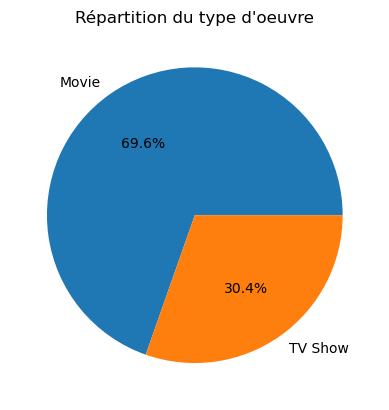

In [66]:
'''
question 23 a
'''

# Compter le nombre d'oeuvres pour chaque type
counts = data["type"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Répartition du type d\'oeuvre')
plt.show()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64


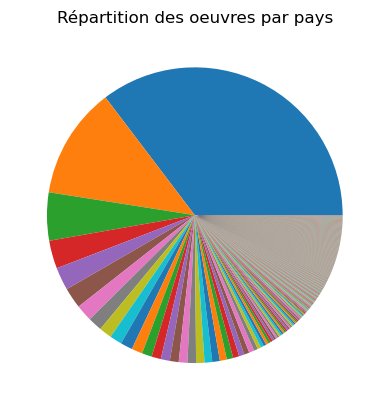

In [67]:
'''
question 23 b
'''

# Compter le nombre d'oeuvres pour chaque pays
counts = data["country"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts)
plt.title('Répartition des oeuvres par pays')
plt.show()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64


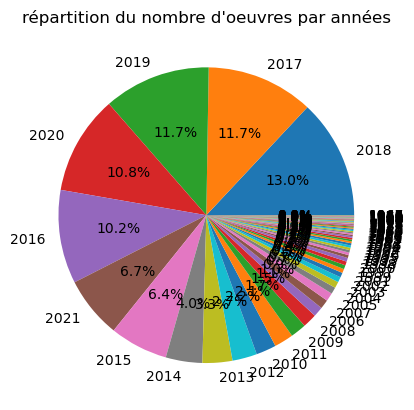

In [68]:
'''
question 23 c
'''

# Compter le nombre d'oeuvres pour chaque type
counts = data["release_year"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('répartition du nombre d\'oeuvres par années')
plt.show()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


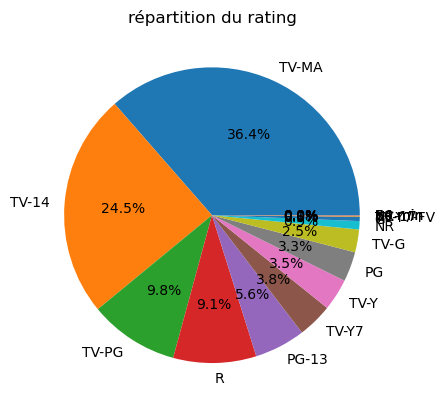

In [69]:
'''
question 23 d
'''

# Compter le nombre d'oeuvres pour chaque type
counts = data["rating"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('répartition du rating')
plt.show()

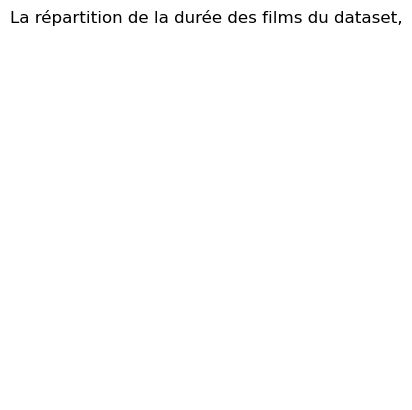

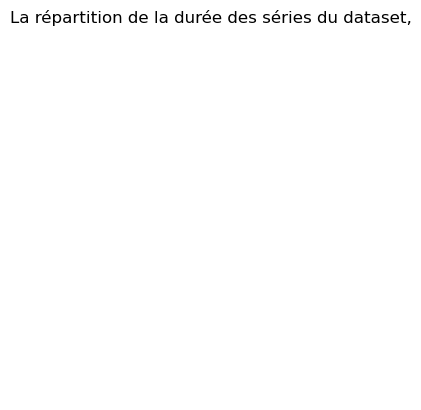

In [84]:
'''
question 23 e & f
'''

#selection des films
films = data[data["type"]=="Movie"]
#selection des films
films = data[data["type"]=="TV Show"]

# Compter le nombre d'oeuvres pour chaque type
counts_films = films["duration"].value_counts()
counts_films = films["duration"].value_counts()

# Créer un diagramme 
plt.pie(counts_films, labels=counts_films.index)
plt.title('La répartition de la durée des films du dataset,')
plt.show()
# Créer un diagramme 
plt.pie(counts_films, labels=counts_films.index, autopct='%1.1f%%')
plt.title('La répartition de la durée des séries du dataset,')
plt.show()

listed_in
[Dramas, International Movies]                          362
[Documentaries]                                         359
[Stand-Up Comedy]                                       334
[Comedies, Dramas, International Movies]                274
[Dramas, Independent Movies, International Movies]      252
                                                       ... 
[Kids' TV, TV Action & Adventure, TV Dramas]              1
[TV Comedies, TV Dramas, TV Horror]                       1
[Children & Family Movies, Comedies, LGBTQ Movies]        1
[Kids' TV, Spanish-Language TV Shows, Teen TV Shows]      1
[Cult Movies, Dramas, Thrillers]                          1
Name: count, Length: 514, dtype: int64


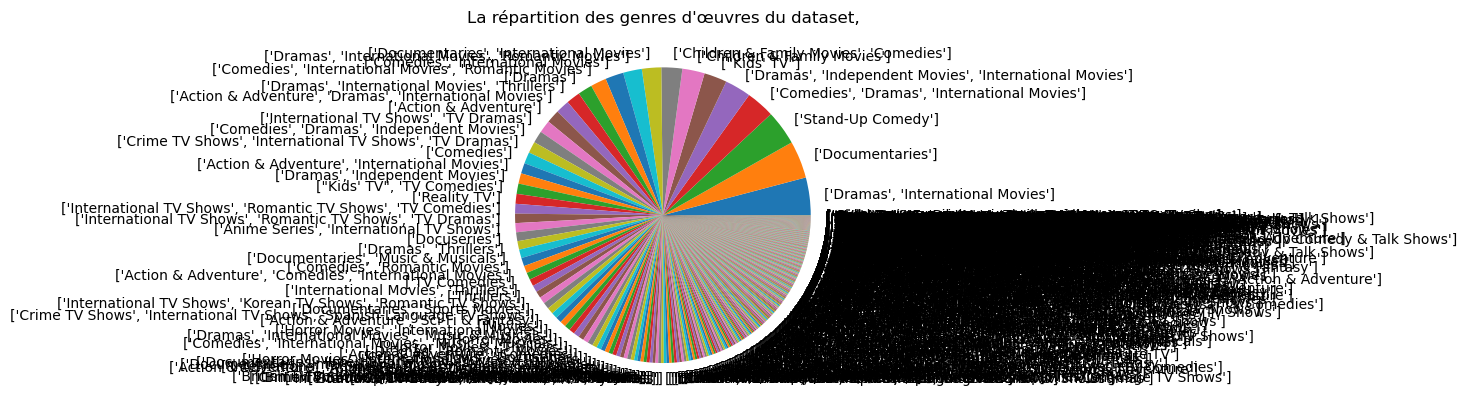

In [85]:
'''
question 23 g
'''

# Compter le nombre d'oeuvres pour chaque type
counts = data["listed_in"].value_counts()
print(counts)

# Créer un diagramme 
plt.pie(counts, labels=counts.index)
plt.title('La répartition des genres d\'œuvres du dataset,')
plt.show()

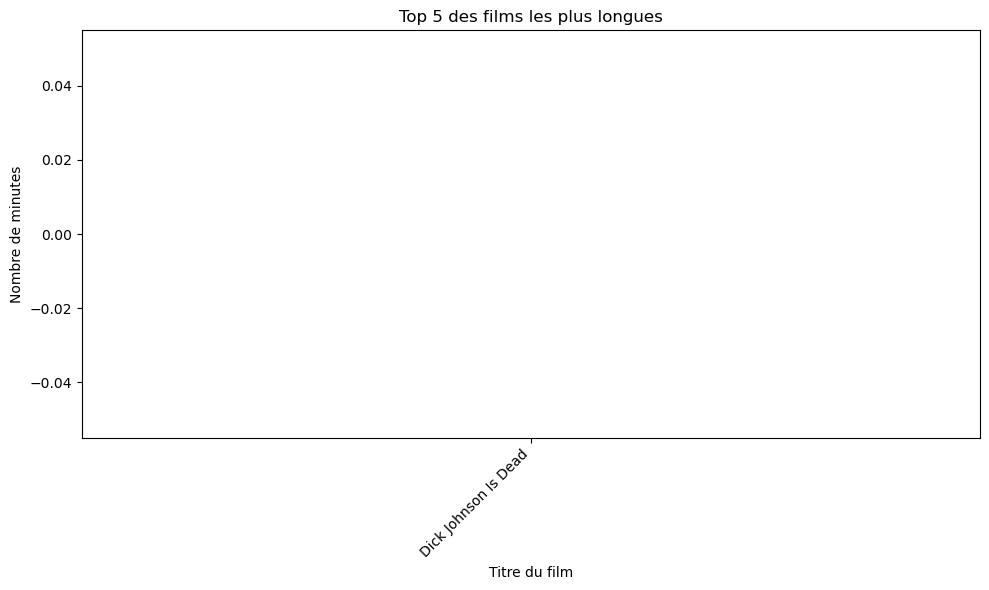

In [86]:
'''
question 23 h
'''


# Extraire les nombres de la colonne "duration"
data["duration"] = data["duration"].str.extract('(\d+)').astype(float)

# Trier les séries par durée (en ordre décroissant)
top_films = data[data["type"] == "Movie"].sort_values(by="duration", ascending=False).head(5)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(top_films["title"], top_films["duration"])
plt.xlabel('Titre du film')
plt.ylabel('Nombre de minutes')
plt.title('Top 5 des films les plus longues')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter la superposition
plt.show()

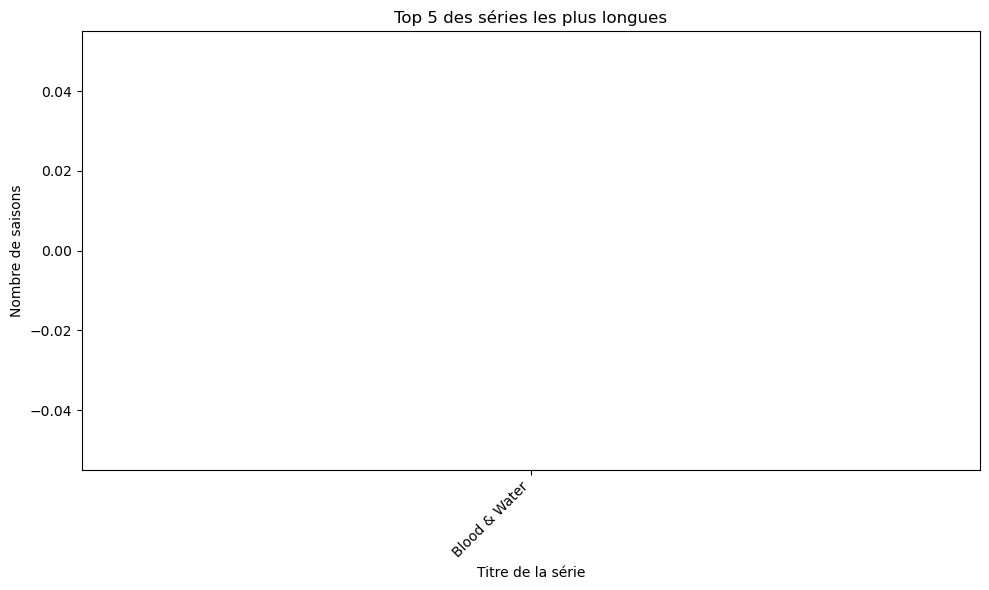

In [88]:
'''
question 23 i
'''

# Extraire les nombres de la colonne "duration"
# data["duration"] = data["duration"].str.extract('(\d+)').astype(float)

# Trier les séries par durée (en ordre décroissant)
top_films = data[data["type"] == "TV Show"].sort_values(by="duration", ascending=False).head(5)

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(top_films["title"], top_films["duration"])
plt.xlabel('Titre de la série')
plt.ylabel('Nombre de saisons')
plt.title('Top 5 des séries les plus longues')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter la superposition
plt.show()

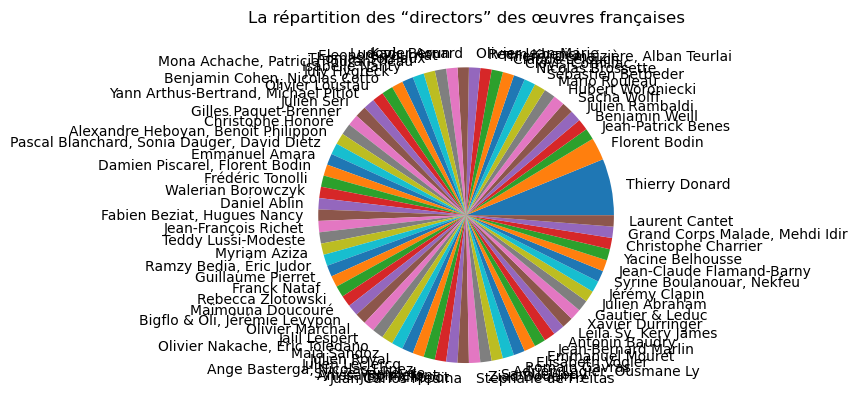

In [89]:
'''
question 23 j
'''

oeuvres_francais = data[data["country"]=="France"]

directeur_francais = oeuvres_francais["director"].value_counts()


# Créer un diagramme 
plt.pie(directeur_francais, labels=directeur_francais.index)
plt.title('La répartition des “directors” des œuvres françaises')
plt.show()

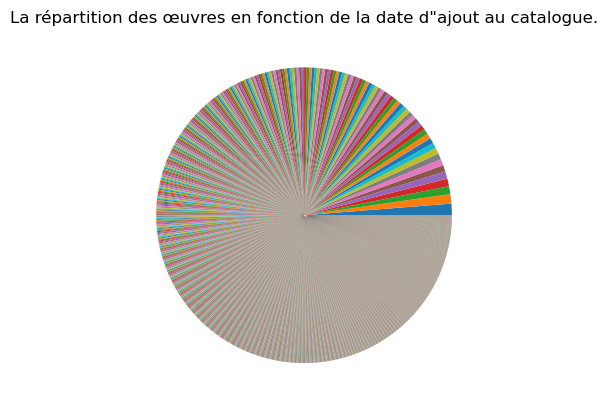

In [90]:
'''
question 23 k
'''

oeuvre_par_date = data["date_added"].value_counts()


# Créer un diagramme 
plt.pie(oeuvre_par_date)
plt.title('La répartition des œuvres en fonction de la date d"ajout au catalogue.')
plt.show()